In [3]:
import pandas as pd
import numpy as np
from magi_module_Copy import get_report
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import RobustScaler
%matplotlib inline

return 데이터가 2012년부터 존재하기 때문에 그 이전 기간을 백테스팅할 수는 없다

In [4]:
price_deviation = pd.read_csv('./price_deviation.csv', encoding = 'euc_kr')
price_deviation['tdate'] = pd.to_datetime(price_deviation['tdate'])
price_deviation = price_deviation.set_index('tdate').drop('Unnamed: 0', axis=1)

In [5]:
price_deviation.head(10)

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2006-06-27,0.26,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-28,0.07,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-29,0.01,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,0.26,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-03,0.06,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-04,0.24,-0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-05,0.18,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-06,0.29,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-07,0.30,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
price_deviation.describe()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
count,3689.000000,3689.000000,3391.000000,3253.000000,3155.000000,2903.000000,2865.000000,2757.000000,2748.000000,2670.000000,...,117.000000,117.000000,117.000000,77.000000,60.000000,35.000000,35.000000,5.00000,5.00000,5.000000
mean,0.040520,0.028455,0.067561,0.136886,-0.182945,-0.015687,-0.020297,0.038179,0.101670,0.044199,...,-0.434786,-0.697692,-0.692821,0.214416,0.092167,-0.119429,-0.164286,-0.04000,-0.04000,-0.140000
std,0.571867,0.529817,0.458871,0.336789,0.983186,0.259429,0.734578,0.211750,0.262888,1.093855,...,0.683651,2.585427,1.760866,0.156554,0.099116,0.351291,0.420793,0.37769,0.37769,0.136382
min,-16.320000,-11.220000,-5.450000,-11.120000,-7.360000,-12.590000,-4.690000,-5.710000,-3.790000,-12.030000,...,-2.300000,-9.310000,-4.980000,-0.040000,-0.030000,-0.910000,-1.000000,-0.65000,-0.65000,-0.360000
25%,-0.120000,-0.110000,-0.100000,0.040000,-0.690000,-0.030000,-0.420000,-0.060000,-0.030000,-0.400000,...,-0.860000,-2.270000,-1.760000,0.050000,0.020000,-0.260000,-0.385000,-0.16000,-0.16000,-0.140000
50%,0.030000,0.040000,0.050000,0.160000,-0.310000,-0.010000,-0.030000,0.030000,0.110000,0.110000,...,-0.380000,-0.630000,-0.760000,0.200000,0.050000,-0.170000,-0.210000,0.14000,0.14000,-0.140000
75%,0.290000,0.290000,0.300000,0.270000,0.370000,0.030000,0.400000,0.130000,0.250000,0.540000,...,-0.080000,1.150000,0.370000,0.370000,0.152500,0.055000,0.010000,0.22000,0.22000,-0.060000
max,3.750000,4.220000,3.400000,3.630000,7.270000,1.760000,4.740000,1.480000,2.280000,22.240000,...,1.510000,5.250000,4.160000,0.500000,0.330000,0.660000,0.950000,0.25000,0.25000,-0.000000


## RobustScaler 사용해서 scaling하기
#### scaling한 결과, scaling했을 때 모든 기간에서 Quan1은 더 좋게, Quan5는 더 나쁘게 나옴. Scaling하는 게 더 성능 좋음
#### 하지만 turnover는 항상 더 높게 나옴

In [9]:
ind = price_deviation.index
col = price_deviation.columns

In [10]:
scale = RobustScaler()
price_deviation_scaled =pd.DataFrame(scale.fit_transform(price_deviation), index=ind, columns=col)
price_deviation_scaled.describe()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
count,3689.000000,3689.000000,3391.000000,3253.000000,3155.000000,2903.000000,2865.000000,2757.000000,2748.000000,2670.000000,...,117.000000,117.000000,117.000000,77.000000,60.000000,35.000000,35.000000,5.000000,5.000000,5.000000e+00
mean,0.025660,-0.028863,0.043903,-0.100496,0.119864,-0.094787,0.011833,0.043048,-0.029749,-0.070002,...,-0.070239,-0.019793,0.031540,0.045049,0.318239,0.160544,0.115732,-0.473684,-0.473684,1.776357e-16
std,1.394797,1.324543,1.147178,1.464302,0.927534,4.323822,0.895827,1.114472,0.938884,1.163675,...,0.876476,0.755973,0.826698,0.489232,0.748047,1.115210,1.065298,0.993922,0.993922,1.704773e+00
min,-39.878049,-28.150000,-13.750000,-49.043478,-6.650943,-209.666667,-5.682927,-30.210526,-13.928571,-12.914894,...,-2.461538,-2.538012,-1.981221,-0.750000,-0.603774,-2.349206,-2.000000,-2.078947,-2.078947,-2.750000e+00
25%,-0.365854,-0.375000,-0.375000,-0.521739,-0.358491,-0.333333,-0.475610,-0.473684,-0.500000,-0.542553,...,-0.615385,-0.479532,-0.469484,-0.468750,-0.226415,-0.285714,-0.443038,-0.789474,-0.789474,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.634146,0.625000,0.625000,0.478261,0.641509,0.666667,0.524390,0.526316,0.500000,0.457447,...,0.384615,0.520468,0.530516,0.531250,0.773585,0.714286,0.556962,0.210526,0.210526,1.000000e+00
max,9.073171,10.450000,8.375000,15.086957,7.150943,29.500000,5.817073,7.631579,7.750000,23.542553,...,2.423077,1.719298,2.309859,0.937500,2.113208,2.634921,2.936709,0.289474,0.289474,1.750000e+00


In [11]:
price_deviation_scaled

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2006-06-27,0.560976,-0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-28,0.097561,0.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-29,-0.048780,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,0.560976,1.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-03,0.073171,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,0.756098,0.850,0.500,-0.608696,0.886792,0.166667,-1.670732,-0.421053,0.214286,-0.148936,...,-0.423077,-0.105263,-0.159624,0.21875,0.603774,-0.952381,-0.734177,-2.078947,-2.078947,1.00
2021-05-26,0.512195,-0.100,-0.225,-0.521739,0.867925,-0.333333,-1.097561,0.263158,-0.142857,-0.138298,...,-0.025641,0.593567,0.389671,0.37500,0.528302,-0.285714,-0.278481,-0.789474,-0.789474,1.75
2021-05-27,0.097561,-0.150,0.225,-0.434783,0.698113,0.000000,0.012195,1.210526,-0.892857,0.489362,...,0.500000,0.096491,0.300469,-0.50000,1.509434,1.333333,0.506329,0.000000,0.000000,0.00


## 괴리율 전략 함수로 정의

In [28]:
def first(start, end, resampling):
    price_deviation_daily_score = price_deviation.resample(resampling).first().loc[start : end]
    daily_summary, daily_ress = get_report(price_deviation_daily_score)
    return daily_ress.plot(figsize = (10, 5)), daily_summary

In [132]:
# scale한 자료 이용한 괴리율 전략 함수!
def first_scaled(start, end, resampling):
    price_deviation_daily_score = price_deviation_scaled.resample(resampling).first().loc[start : end]
    daily_summary, daily_ress = get_report(price_deviation_daily_score)
    return daily_ress.plot(figsize = (10, 5)), daily_summary

#### 대회 예측 기간

In [133]:
target_start_date = '2018-12-31'
target_end_date = '2021-05-31' #29개월=2년 5개월

(<matplotlib.axes._subplots.AxesSubplot at 0x1feaedd4688>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.436686    0.747444    1.234891    2.422097    5.973716   
 MDD        -0.590518   -0.479696   -0.341945   -0.234050   -0.194957   
 TURNOVER  434.645398  472.411062  479.190254  483.271820  445.407934   
 CAGR       -0.241324   -0.092473    0.072859    0.342962    0.814463   
 SHARPE     -0.451344   -0.145686    0.135570    0.563755    1.057665   
 
                  L-S    RANK_L-S  
 RETURN     13.354969    9.154104  
 MDD        -0.034746   -0.026274  
 TURNOVER  880.053333  513.108474  
 CAGR        1.372544    1.091889  
 SHARPE      1.893187    2.094673  )

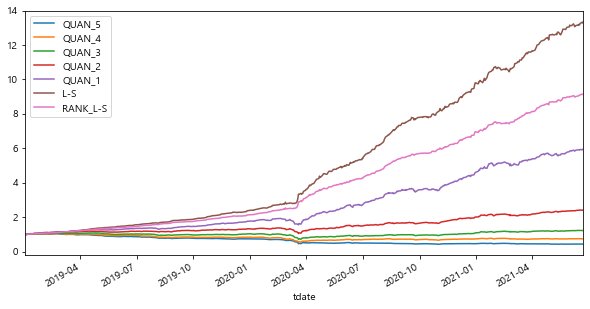

In [31]:
first_scaled(target_start_date, target_end_date, 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1d76a548>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.495153    0.780330    1.089306    2.401158    5.739789   
 MDD        -0.549509   -0.379263   -0.358452   -0.251164   -0.228985   
 TURNOVER  395.709464  439.770567  461.138318  462.680344  406.645266   
 CAGR       -0.208872   -0.079354    0.028924    0.339081    0.790463   
 SHARPE     -0.378681   -0.146944    0.067073    0.520532    0.897499   
 
                  L-S    RANK_L-S  
 RETURN     11.386802    7.777572  
 MDD        -0.056929   -0.044282  
 TURNOVER  802.354729  458.567576  
 CAGR        1.249748    0.981290  
 SHARPE      1.611094    1.735601  )

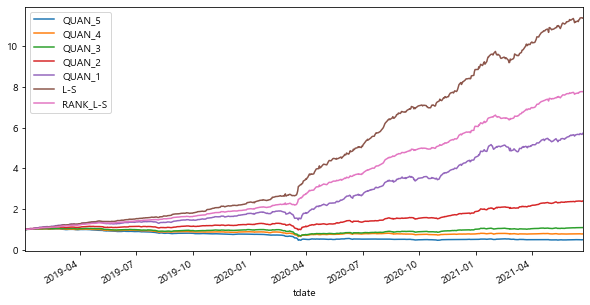

In [8]:
first(target_start_date, target_end_date, 'D')

#### 대회 예측 기간 직전 기간

(<matplotlib.axes._subplots.AxesSubplot at 0x1feae754988>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.326841    0.655942    0.957193    1.551936    3.945257   
 MDD        -0.674053   -0.344058   -0.202499   -0.077575   -0.074535   
 TURNOVER  431.613029  477.789646  484.708728  482.404640  449.255010   
 CAGR       -0.311170   -0.131129   -0.014478    0.157776    0.580126   
 SHARPE     -0.676261   -0.262275   -0.021890    0.328383    0.962227   
 
                  L-S    RANK_L-S  
 RETURN     11.867490    7.349913  
 MDD        -0.016242   -0.014587  
 TURNOVER  880.868039  504.359875  
 CAGR        1.280970    0.944289  
 SHARPE      1.627291    1.643852  )

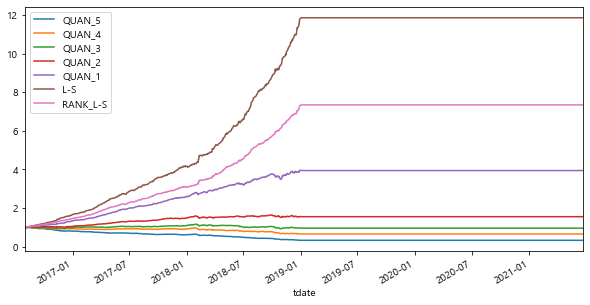

In [32]:
first_scaled('2016-07-31', '2018-12-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1feaf88b448>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.373137    0.648320    0.886693    1.574136    3.711956   
 MDD        -0.627043   -0.353677   -0.247307   -0.077352   -0.105231   
 TURNOVER  384.703496  456.471769  464.051645  472.991255  430.541294   
 CAGR       -0.280071   -0.134508   -0.039293    0.163271    0.548344   
 SHARPE     -0.687994   -0.278294   -0.074965    0.314405    0.781109   
 
                  L-S    RANK_L-S  
 RETURN      9.850356    6.484488  
 MDD        -0.023618   -0.015151  
 TURNOVER  815.244790  463.045433  
 CAGR        1.143634    0.864770  
 SHARPE      1.463148    1.562198  )

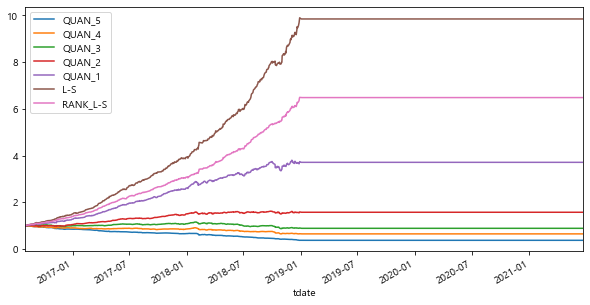

In [36]:
first('2016-07-31', '2018-12-31', 'D')

#### 2014 - 2016

(<matplotlib.axes._subplots.AxesSubplot at 0x1fea75de2c8>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.216594    0.575410    0.941032    1.877842    6.011341   
 MDD        -0.783541   -0.433926   -0.172271   -0.084798   -0.089583   
 TURNOVER  447.578308  488.311752  486.592810  484.080220  455.263875   
 CAGR       -0.399450   -0.168251   -0.020055    0.233729    0.818265   
 SHARPE     -0.597606   -0.243383   -0.024217    0.296941    0.795785   
 
                  L-S    RANK_L-S  
 RETURN     26.949770   15.047629  
 MDD        -0.037801   -0.017114  
 TURNOVER  902.842183  528.127416  
 CAGR        1.998138    1.468820  
 SHARPE      1.274514    1.297130  )

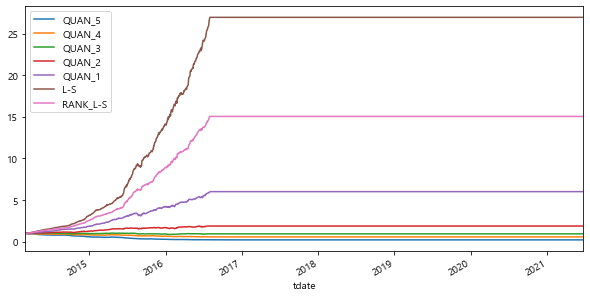

In [33]:
first_scaled('2014-02-28', '2016-07-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1da13d08>,
               QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
 RETURN      0.213945    0.612147    1.019032    1.582926    6.196811   
 MDD        -0.790702   -0.397144   -0.142258   -0.075778   -0.106886   
 TURNOVER  402.687321  458.411891  468.869980  472.088764  431.583383   
 CAGR       -0.401909   -0.150913    0.006304    0.165432    0.836775   
 SHARPE     -0.606445   -0.234239    0.016250    0.224556    0.696748   
 
                  L-S    RANK_L-S  
 RETURN     28.135302   14.258964  
 MDD        -0.057231   -0.035382  
 TURNOVER  834.270704  483.875763  
 CAGR        2.041472    1.424912  
 SHARPE      1.148069    1.179315  )

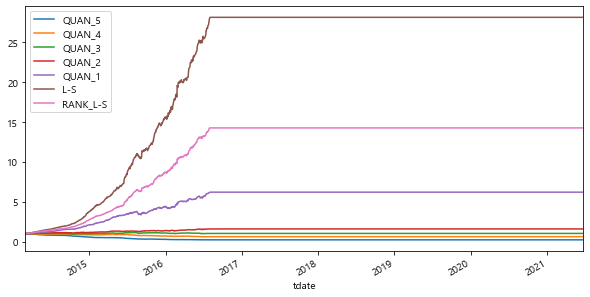

In [11]:
first('2014-02-28', '2016-07-31', 'D')

#### 전체기간

(<matplotlib.axes._subplots.AxesSubplot at 0x1feae40e1c8>,
                QUAN_5       QUAN_4       QUAN_3       QUAN_2       QUAN_1  \
 RETURN       0.030914     0.282112     1.112327     7.058692   141.674364   
 MDD         -0.969865    -0.793545    -0.411346    -0.234050    -0.194957   
 TURNOVER  1313.836735  1438.512460  1450.491792  1449.756680  1349.926819   
 CAGR        -0.686153    -0.344146     0.036122     0.918263     4.213112   
 SHARPE      -0.780900    -0.285799     0.039766     0.515516     1.245512   
 
                   L-S     RANK_L-S  
 RETURN    4271.268152  1012.432611  
 MDD         -0.037801    -0.026274  
 TURNOVER  2663.763554  1545.595765  
 CAGR        15.225034     9.041271  
 SHARPE       2.305085     2.419129  )

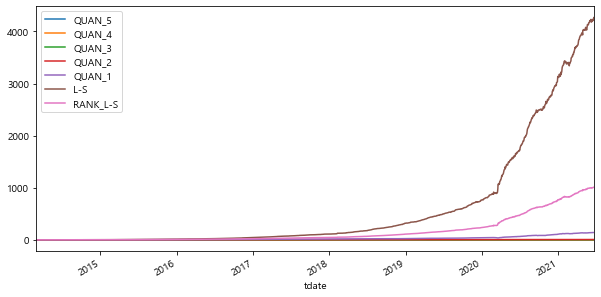

In [34]:
first_scaled('2014-02-28', '2021-05-31', 'D')

(<matplotlib.axes._subplots.AxesSubplot at 0x1ec1dac3208>,
                QUAN_5       QUAN_4       QUAN_3       QUAN_2       QUAN_1  \
 RETURN       0.039528     0.309688     0.984263     5.983062   132.028274   
 MDD         -0.962787    -0.744544    -0.482086    -0.251164    -0.228985   
 TURNOVER  1183.100280  1354.654226  1394.059943  1407.760364  1268.769943   
 CAGR        -0.659354    -0.323437    -0.005273     0.815409     4.092007   
 SHARPE      -0.743942    -0.295832     0.009138     0.452734     1.051666   
 
                   L-S     RANK_L-S  
 RETURN    3155.769580   719.130501  
 MDD         -0.057231    -0.044282  
 TURNOVER  2451.870223  1405.488772  
 CAGR        13.667916     7.959200  
 SHARPE       1.986382     2.102502  )

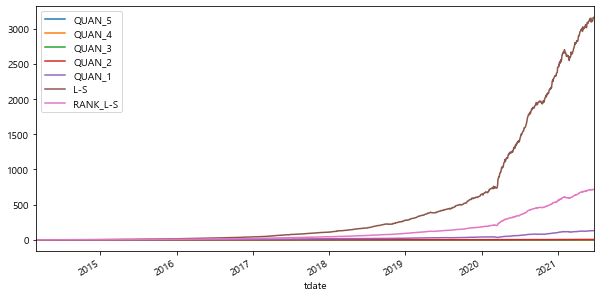

In [13]:
first('2014-02-28', '2021-05-31', 'D')

기간에 따라 괴리율 전략은 대체로 robust한 결과를 보여준다 (Quan1부터 Quan5까지 적절하게 잘 성과가 나뉘어있고, L-S의 sharpe ratio가 1이상, 다만 'D'라서 turnover가 높다 (이 부분은 조건에 따른 매매전략으로 바꾸면 해결될 듯)
--> scaling하는 게 더 성능 좋다

## 특정 조건에 따른 매매 - turnover 낮추기
quan_1부터 quan_5까지 10/11에 뽑아놨다면, 그게 전날인 10/10보다 **각 quan별 스코어의 변동이 충분히 클 때만** 10/11 score가 추가되도록

In [12]:
price_deviation_scaled  ##매일 score

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2006-06-27,0.560976,-0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-28,0.097561,0.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-29,-0.048780,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,0.560976,1.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-03,0.073171,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,0.756098,0.850,0.500,-0.608696,0.886792,0.166667,-1.670732,-0.421053,0.214286,-0.148936,...,-0.423077,-0.105263,-0.159624,0.21875,0.603774,-0.952381,-0.734177,-2.078947,-2.078947,1.00
2021-05-26,0.512195,-0.100,-0.225,-0.521739,0.867925,-0.333333,-1.097561,0.263158,-0.142857,-0.138298,...,-0.025641,0.593567,0.389671,0.37500,0.528302,-0.285714,-0.278481,-0.789474,-0.789474,1.75
2021-05-27,0.097561,-0.150,0.225,-0.434783,0.698113,0.000000,0.012195,1.210526,-0.892857,0.489362,...,0.500000,0.096491,0.300469,-0.50000,1.509434,1.333333,0.506329,0.000000,0.000000,0.00


In [13]:
## 각 날짜별 quan1부터 quan5까지 나누기
sig_data = price_deviation_scaled.loc['2018-12-31': '2021-05-31'].rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)
sig_data

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,2.0,2.0,0.0,3.0,2.0,0.0,3.0,1.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,2.0,2.0,4.0,2.0,2.0,3.0,3.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,2.0,4.0,3.0,2.0,4.0,1.0,2.0,2.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,1.0,3.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,3.0,4.0,3.0,0.0,4.0,2.0,0.0,1.0,2.0,1.0,...,1.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,4.0
2021-05-26,3.0,2.0,1.0,0.0,4.0,1.0,0.0,3.0,2.0,2.0,...,2.0,4.0,3.0,3.0,3.0,1.0,1.0,0.0,0.0,4.0
2021-05-27,3.0,2.0,3.0,1.0,4.0,2.0,2.0,4.0,0.0,3.0,...,3.0,3.0,3.0,1.0,4.0,4.0,3.0,2.0,2.0,2.0


In [15]:
def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

C:\Users\jky93\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


quan 0 is


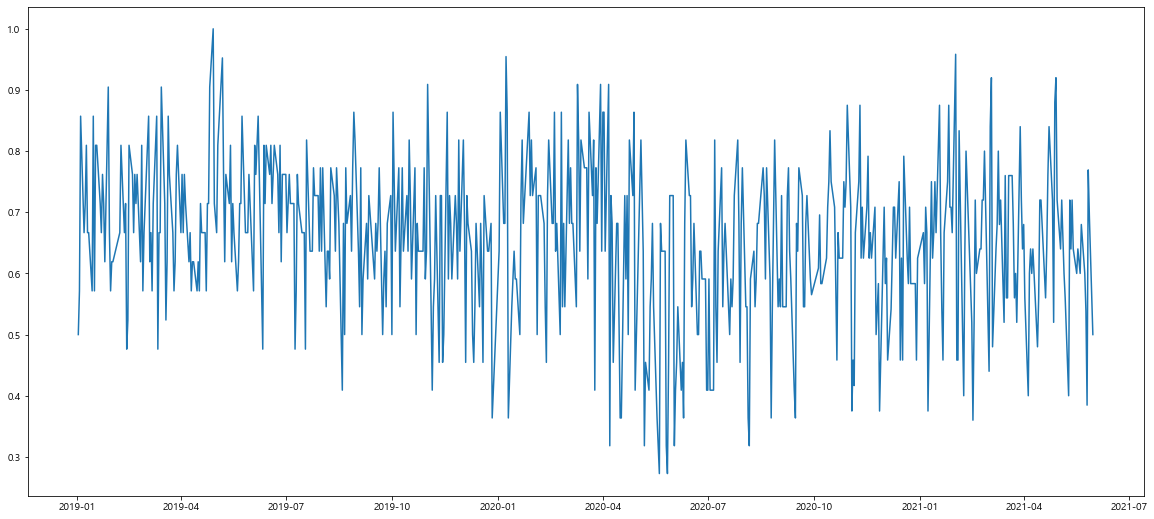

quan 1 is


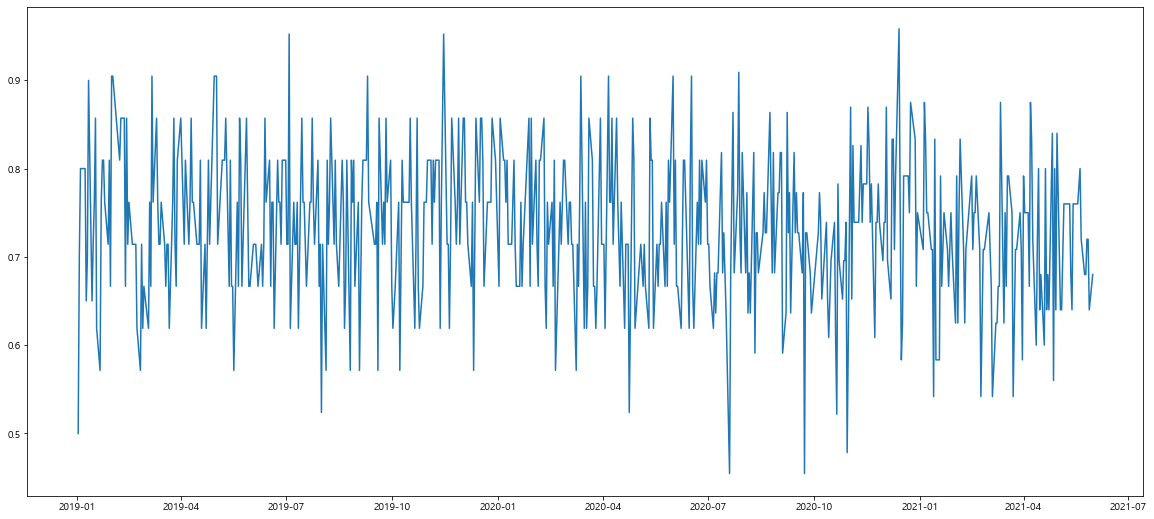

quan 2 is


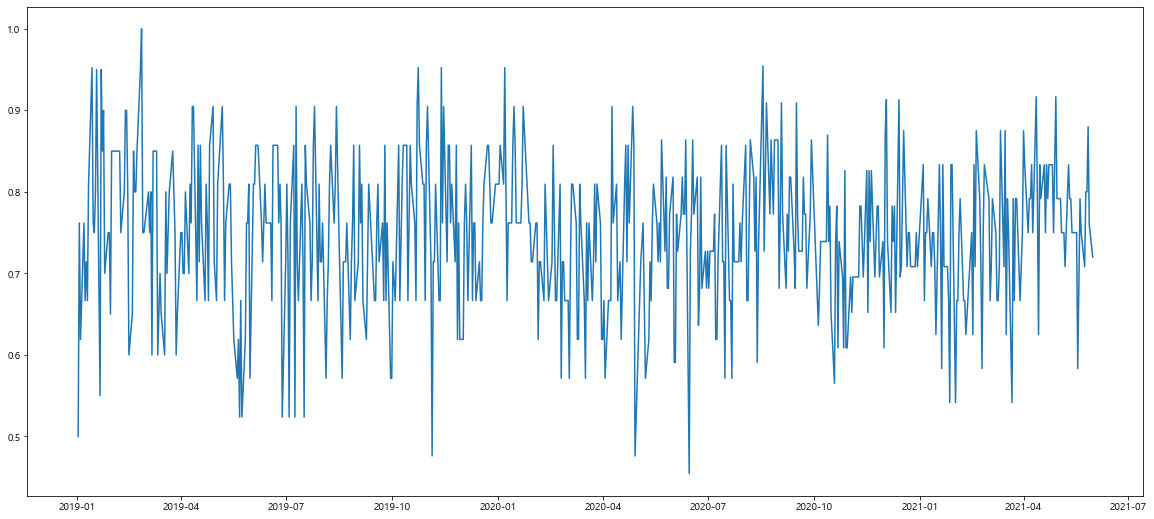

quan 3 is


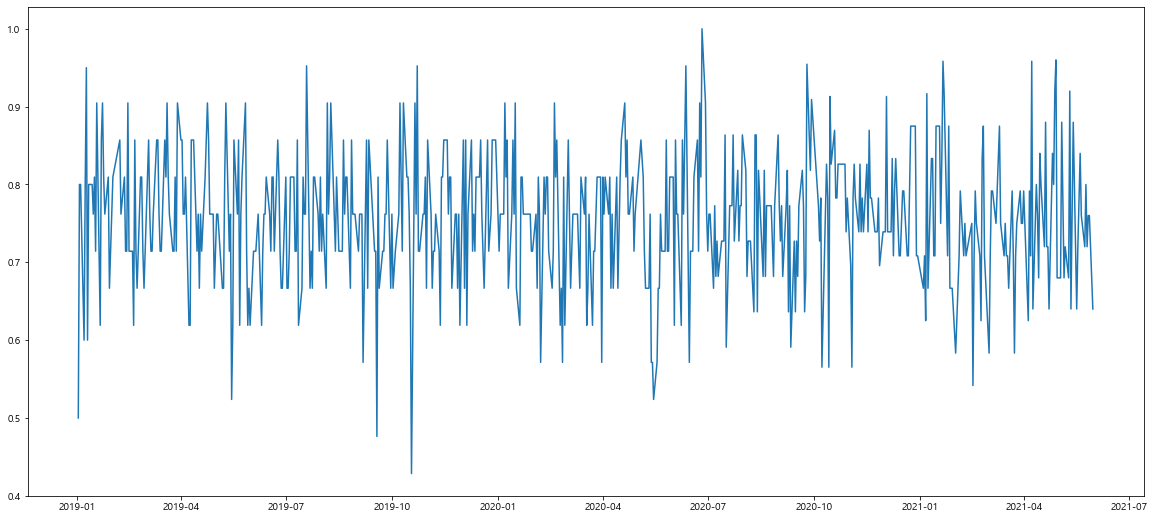

quan 4 is


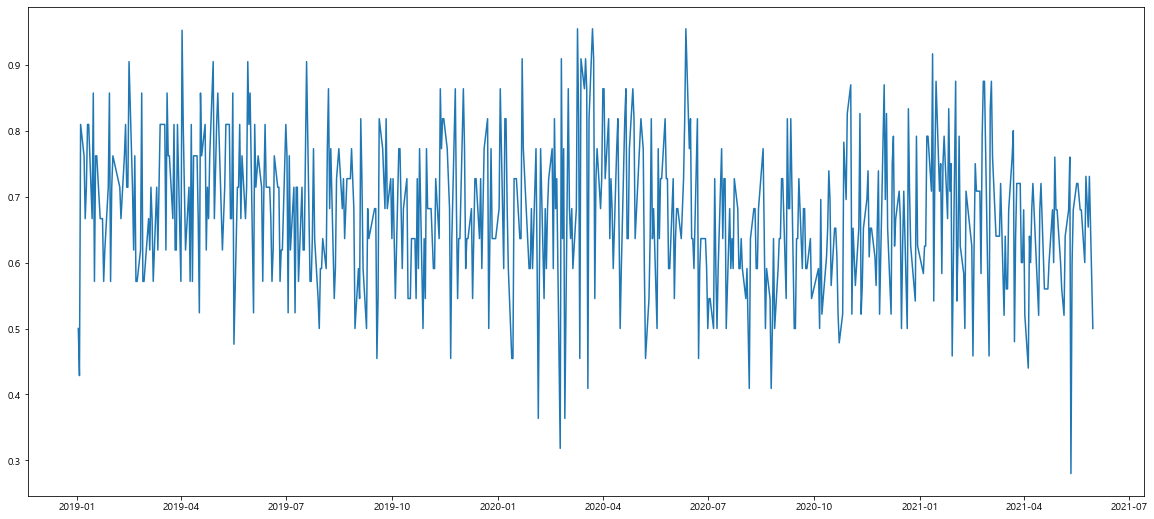

In [16]:
for signal in range(5):
    name = f'quan_{signal}'  #동일비중 포트폴리오 구성
    weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
    port = weight_sig_data.fillna(0)
    
    turnover = weight_sig_data.diff()  # turnover 계산1 --> weight의 변화분 찾는 것. weight가 변했다 = 그 주식을 매매했다 (포트에서 비중이 변동됨)
    turnover.iloc[0] = weight_sig_data.iloc[0]

    #turnover 계산2 --> 특정날짜의 weight 변동값의 절대값을 모든 ETF에 대해 더하고 2로 나눠서 (왜냐하면 더하고 뺀 값 중복을 방지하기 위해) 다시 모든 날짜에 대해 더해서 하나의 scalar값으로 나오게끔함
    TO = (abs(turnover).sum(1) / 2)
    plt.figure(figsize=(20,9))
    plt.plot(TO)
    print('quan', signal, 'is')
    plt.show()

#### Threshold 정하기
각 quan별 날짜 수 3689 (2006-06-27 ~ 2021-05-31)   
sig_data를 '2018-12-31' ~ '2021-05-31'로 정해둠

In [19]:
for signal in range(5):
    name = f'quan_{signal}'  #동일비중 포트폴리오 구성
    weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
    port = weight_sig_data.fillna(0)
    
    turnover = weight_sig_data.diff()  # turnover 계산1 --> weight의 변화분 찾는 것. weight가 변했다 = 그 주식을 매매했다 (포트에서 비중이 변동됨)
    turnover.iloc[0] = weight_sig_data.iloc[0]

    #turnover 계산2 --> 특정날짜의 weight 변동값의 절대값을 모든 ETF에 대해 더하고 2로 나눠서 (왜냐하면 더하고 뺀 값 중복을 방지하기 위해) 다시 모든 날짜에 대해 더해서 하나의 scalar값으로 나오게끔함
    TO = (abs(turnover).sum(1) / 2)
    print('전체 기간', len(TO))
    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
        a=0
        for i in range(len(TO)-1):  
            if TO.iloc[i] < threshold:
                a+=1
        print('threshold is ', threshold, a)
    print('==============================')

전체 기간 595
threshold is  0.1 0
threshold is  0.2 0
threshold is  0.3 2
threshold is  0.4 22
threshold is  0.5 68
threshold is  0.6 191
전체 기간 595
threshold is  0.1 0
threshold is  0.2 0
threshold is  0.3 0
threshold is  0.4 0
threshold is  0.5 3
threshold is  0.6 29
전체 기간 595
threshold is  0.1 0
threshold is  0.2 0
threshold is  0.3 0
threshold is  0.4 0
threshold is  0.5 4
threshold is  0.6 34
전체 기간 595
threshold is  0.1 0
threshold is  0.2 0
threshold is  0.3 0
threshold is  0.4 0
threshold is  0.5 2
threshold is  0.6 22
전체 기간 595
threshold is  0.1 0
threshold is  0.2 0
threshold is  0.3 1
threshold is  0.4 4
threshold is  0.5 24
threshold is  0.6 163


#### Threshold는 0.1 로 하는 게 좋겠다. (괴리율 전략에서는 turnover 못 낮추지만... 의미상 50%로 하기에는 너무 포트폴리오가 많이 변하는 것까지 참는 것 같다..)
--> (의미) quan별 포트폴리오의 110%가 바뀌는 시그널이어도 매매 안 하고 홀드한다.  
--------> 10% 이상의 변화가 있어야한다는 시그널일 경우만 괴리율 전략 score대로 리밸런싱 시행

#### turnover 낮추기 함수 구현

In [25]:
delete = []
threshold = 0.1
target_start_date = '2018-12-31'
target_end_date = '2021-05-31' #29개월=2년 5개월

price_deviation_scaled = price_deviation_scaled.loc[target_start_date : target_end_date]
sig_data = price_deviation_scaled.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)


for signal in range(5):
    name = f'quan_{signal}'  #동일비중 포트폴리오 구성
    weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
    port = weight_sig_data.fillna(0)
    
    turnover = weight_sig_data.diff()  # turnover 계산1 --> weight의 변화분 찾는 것. weight가 변했다 = 그 주식을 매매했다 (포트에서 비중이 변동됨)
    turnover.iloc[0] = weight_sig_data.iloc[0]

    #turnover 계산2 --> 특정날짜의 weight 변동값의 절대값을 모든 ETF에 대해 더하고 2로 나눠서 (왜냐하면 더하고 뺀 값 중복을 방지하기 위해) 다시 모든 날짜에 대해 더해서 하나의 scalar값으로 나오게끔함
    TO = (abs(turnover).sum(1) / 2)
    delete_sub= []
    
    for i in range(len(TO)-1):
        if TO.iloc[i] < threshold: #특정날짜의 weight 변동값의 절대값 합이 작은 경우 해당 날짜를 score에서 제외시킴. (리밸런싱 안 함)
            delete_sub.append(i)
    delete.append(delete_sub)

c = set(delete[0])
for i in delete:
    for j in delete:
        if i != j:
            b= set(i).intersection(j)
            c = set(c).union(b) #한번이라도 겹치는 원소는 뺀다
        else:
            continue

delete_common = list(c)
print('delete common is', delete_common)

price_deviation_scaled_threshold = price_deviation_scaled.drop(price_deviation_scaled.index[delete_common], axis=0)
print('After', len(price_deviation_scaled_threshold))

price_deviation_daily_score = price_deviation_scaled_threshold.resample('D').first()
daily_summary, daily_ress = get_report(price_deviation_daily_score)
print(daily_summary)


delete common is []
After 595
              QUAN_5      QUAN_4      QUAN_3      QUAN_2      QUAN_1  \
RETURN      0.436686    0.747444    1.234891    2.422097    5.973716   
MDD        -0.590518   -0.479696   -0.341945   -0.234050   -0.194957   
TURNOVER  434.645398  472.411062  479.190254  483.271820  445.407934   
CAGR       -0.241324   -0.092473    0.072859    0.342962    0.814463   
SHARPE     -0.451344   -0.145686    0.135570    0.563755    1.057665   

                 L-S    RANK_L-S  
RETURN     13.354969    9.154104  
MDD        -0.034746   -0.026274  
TURNOVER  880.053333  514.108474  
CAGR        1.372544    1.091889  
SHARPE      1.893187    2.094673  


In [31]:
def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def lower_turnover(score, target_start_date, target_end_date, threshold, resampling):
    ## 각 날짜별 quan1부터 quan5까지 나누기
    score= score.loc[target_start_date : target_end_date]
    sig_data = score.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)
    delete = []

    for signal in range(5):
        name = f'quan_{signal}'  #동일비중 포트폴리오 구성
        weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
        port = weight_sig_data.fillna(0)

        turnover = weight_sig_data.diff()  # turnover 계산1 --> weight의 변화분 찾는 것. weight가 변했다 = 그 주식을 매매했다 (포트에서 비중이 변동됨)
        turnover.iloc[0] = weight_sig_data.iloc[0]

        #turnover 계산2 --> 특정날짜의 weight 변동값의 절대값을 모든 ETF에 대해 더하고 2로 나눠서 (왜냐하면 더하고 뺀 값 중복을 방지하기 위해) 다시 모든 날짜에 대해 더해서 하나의 scalar값으로 나오게끔함
        TO = (abs(turnover).sum(1) / 2)
        delete_sub= []

        for i in range(len(TO)-1):
            if TO.iloc[i] < threshold: #특정날짜의 weight 변동값의 절대값 합이 작은 경우 해당 날짜를 score에서 제외시킴. (리밸런싱 안 함)
                delete_sub.append(i)
        delete.append(delete_sub)

    c = set(delete[0])
    for i in delete:
        for j in delete:
            if i != j:
                b= set(i).intersection(j)
                c = set(c).union(b)
            else:
                continue

    delete_common = list(c)
    print('delete common is', delete_common)

    score_threshold = score.drop(score.index[delete_common], axis=0)

    price_deviation_daily_score = score_threshold.resample(resampling).first()
    daily_summary, daily_ress = get_report(price_deviation_daily_score)
    return (daily_summary)


In [32]:
lower_turnover(price_deviation_scaled, '2018-12-31', '2021-05-31', 0.6, '2D')

delete common is [0, 1, 514, 515, 516, 519, 8, 10, 522, 523, 524, 13, 528, 20, 532, 535, 27, 28, 541, 543, 544, 548, 37, 550, 42, 555, 556, 45, 561, 50, 562, 563, 55, 567, 572, 66, 579, 580, 69, 71, 75, 589, 590, 591, 91, 92, 102, 106, 107, 127, 128, 134, 144, 146, 149, 155, 157, 166, 168, 169, 171, 173, 175, 176, 178, 179, 181, 184, 188, 195, 197, 203, 206, 207, 208, 209, 211, 214, 215, 217, 220, 223, 228, 232, 233, 234, 236, 238, 239, 244, 245, 252, 253, 254, 256, 257, 258, 267, 272, 273, 281, 283, 285, 291, 299, 303, 312, 315, 318, 319, 321, 323, 327, 330, 331, 332, 333, 334, 336, 337, 338, 339, 343, 344, 345, 348, 349, 350, 351, 352, 353, 354, 357, 359, 360, 362, 363, 366, 367, 368, 369, 370, 371, 372, 374, 375, 378, 381, 382, 383, 384, 385, 389, 392, 393, 394, 395, 396, 398, 399, 400, 404, 406, 407, 408, 411, 412, 413, 415, 416, 420, 421, 422, 427, 428, 431, 432, 435, 436, 443, 444, 453, 454, 455, 468, 469, 470, 471, 474, 476, 477, 483, 484, 485, 488, 490, 491, 492, 495, 498, 501,

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.643755,0.736454,1.113201,1.363239,2.177346,3.333129,2.870315
MDD,-0.476376,-0.425027,-0.347094,-0.268716,-0.243500,-0.074382,-0.056657
TURNOVER,235.430714,244.108583,245.874647,247.818067,235.732515,471.163229,223.484484
CAGR,-0.136544,-0.096943,0.036393,0.108811,0.296112,0.493771,0.421161
SHARPE,-0.258291,-0.166190,0.078909,0.212258,0.485679,0.969216,1.098038


In [29]:
lower_turnover(price_deviation_scaled, '2018-12-31', '2021-05-31', 0.1, 'D')

delete common is []


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.436686,0.747444,1.234891,2.422097,5.973716,13.354969,9.154104
MDD,-0.590518,-0.479696,-0.341945,-0.234050,-0.194957,-0.034746,-0.026274
TURNOVER,434.645398,472.411062,479.190254,483.271820,445.407934,880.053333,514.108474
CAGR,-0.241324,-0.092473,0.072859,0.342962,0.814463,1.372544,1.091889
SHARPE,-0.451344,-0.145686,0.135570,0.563755,1.057665,1.893187,2.094673


In [33]:
lower_turnover(price_deviation_scaled, '2018-12-31', '2021-05-31', 0.1, '2D')

delete common is []


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.683904,0.894923,1.438125,1.916254,3.482692,5.023495,4.054936
MDD,-0.483583,-0.433819,-0.306845,-0.252897,-0.235189,-0.044715,-0.038203
TURNOVER,262.691481,290.452641,293.217252,295.389226,273.510967,536.202448,336.024077
CAGR,-0.118955,-0.036330,0.128753,0.242084,0.515788,0.712650,0.594635
SHARPE,-0.209694,-0.045482,0.221567,0.414712,0.734373,1.326295,1.507817


In [30]:
lower_turnover(price_deviation_scaled, '2018-12-31', '2021-05-31', 0.5, 'D')

delete common is [515, 516, 519, 523, 273, 532, 535, 27, 556, 45, 303, 562, 312, 315, 318, 319, 580, 327, 330, 331, 332, 591, 337, 338, 339, 343, 344, 345, 348, 349, 350, 352, 353, 354, 107, 368, 369, 371, 372, 375, 127, 389, 134, 394, 395, 407, 155, 421, 422, 175, 444, 453, 454, 455, 207, 211, 214, 471, 476, 483, 228, 485, 233, 492, 239, 498, 244, 507, 252]


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.421115,0.708527,1.121628,2.036934,4.484342,10.407114,7.440853
MDD,-0.605409,-0.491053,-0.379192,-0.234050,-0.194957,-0.034746,-0.026274
TURNOVER,412.933868,431.232963,436.595921,439.176950,412.092225,825.026094,413.393304
CAGR,-0.250451,-0.108505,0.039002,0.267629,0.649047,1.183283,0.952275
SHARPE,-0.489346,-0.181876,0.083065,0.473641,0.926390,1.767203,1.948921


In [34]:
lower_turnover(price_deviation_scaled, '2018-12-31', '2021-05-31', 0.5, '2D')

delete common is [515, 516, 519, 523, 273, 532, 535, 27, 556, 45, 303, 562, 312, 315, 318, 319, 580, 327, 330, 331, 332, 591, 337, 338, 339, 343, 344, 345, 348, 349, 350, 352, 353, 354, 107, 368, 369, 371, 372, 375, 127, 389, 134, 394, 395, 407, 155, 421, 422, 175, 444, 453, 454, 455, 207, 211, 214, 471, 476, 483, 228, 485, 233, 492, 239, 498, 244, 507, 252]


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.703760,0.882512,1.393105,1.737070,2.982556,4.180837,3.489325
MDD,-0.477976,-0.433379,-0.316646,-0.251503,-0.235189,-0.055658,-0.056657
TURNOVER,262.691719,280.721257,283.774545,285.783266,266.996290,529.688009,305.729173
CAGR,-0.110509,-0.040805,0.116849,0.202096,0.439449,0.610971,0.516749
SHARPE,-0.195804,-0.054221,0.207331,0.358265,0.655884,1.181120,1.333872


### (Appendix)
#### 대회측에서 제공한 get_report 분해해보기

In [84]:
def sig_to_weight(sig_series, long_sig, short_sig, weight):
    long_count = (sig_series == long_sig).sum()
    short_count = (sig_series == short_sig).sum()
    
    if (long_count != 0) & (short_count != 0):
        sig_series.loc[(sig_series != long_sig) & (sig_series != short_sig)] = np.NaN
        sig_series.loc[sig_series == long_sig] = weight / long_count
        sig_series.loc[sig_series == short_sig] = -1. * weight / short_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def get_ic(ret_1m, scores):
    ret_ = ret_1m.reindex(scores.index, columns=scores.columns).loc[scores.index].values
    numbers = scores.count(1).values
    scor = scores.values

    dates = scores.index

    scor = np.expand_dims(scor, -1)
    ret_ = np.expand_dims(ret_, -1)

    cal_ic = np.concatenate([scor, ret_], axis=-1)

    cov = np.nansum(np.prod(cal_ic - np.nanmean(cal_ic, 1, keepdims=True), 2), 1)

    ic = cov / np.nanstd(cal_ic, 1).prod(-1) / numbers
    return pd.DataFrame(ic, columns=['IC'], index=dates)

def build_rank_port(scores):
    """
    결과값 scores가 들어가면 rank_port 생성
    percent_rank를 기준으로 abosolute deviation 기준으로 normalize하고
    2를 곱해 LONG/SHORT이 각각 1이 되도록 조정한 롱숏 포트폴리오 생성

    params: scores : 모델 결과값
    """
    pct_rank = scores.rank(1, pct=True).T  # , method = 'max').T

    rank_port = pct_rank - pct_rank.mean()

    rank_port = (rank_port / rank_port.abs().sum()).T * 2
    return rank_port


In [117]:
score = price_deviation_scaled.iloc[1721:2316,].copy()
rtn = pd.read_csv('./ret_data.csv')
rtn = rtn.set_index('tdate')
rtn.index = pd.to_datetime(rtn.index)
rtn = rtn.shift(-1)

score.index = pd.to_datetime(score.index)
### 각각이 특정날짜에 어떤 quan_{}에 속하는지 파악하기
sig_data = score.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)

test_cut = 5

ress = []
mdds = []
turnovers = []
cagrs = []
sharpes = []

for signal in range(test_cut):
    name = f'quan_{signal}'  #동일비중 포트폴리오 구성
    weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
    port = weight_sig_data.fillna(0)
    
    ret_data_ = rtn.loc[port.index[0]:]  # 해당 기간 맵핑
    ret_data_ = ret_data_.reindex(columns=port.columns)  # 종목 일치

    port = port.reindex(ret_data_.index, method = 'ffill')

    port_returns = (ret_data_ * port).sum(1).shift(1) #특정날짜의 종목별 수익률에 가중치 곱해서 포트폴리오의 수익률 구하기
    
    turnover = weight_sig_data.diff()  # turnover 계산1 --> weight의 변화분 찾는 것. weight가 변했다 = 그 주식을 매매했다 (포트에서 비중이 변동됨)
    turnover.iloc[0] = weight_sig_data.iloc[0]
    print('quan', signal, 'turnover')
    print(turnover)
    
    res = (1 + port_returns.fillna(0)).cumprod() # (1+수익률)을 복리 계산.

    #turnover 계산2 --> 특정날짜의 weight 변동값의 절대값을 모든 ETF에 대해 더하고 2로 나눠서 (왜냐하면 더하고 뺀 값 중복을 방지하기 위해) 다시 모든 날짜에 대해 더해서 하나의 scalar값으로 나오게끔함

    TO = (abs(turnover).sum(1) / 2).sum().mean()
    print('quan', signal, 'TO')
    print(TO)
    print((abs(turnover).sum(1) / 2).sum())
    
    MDD = (res / res.cummax() - 1).min()  # MDD
    CAGR_ = res.values[-1] ** (1 / 36 / 30 * 360) - 1
    vol = np.std(res.pct_change().dropna())
    sharpe = np.mean(res.pct_change().dropna()) / np.std(res.pct_change().dropna()) * np.sqrt(12)

    sharpes.append(sharpe)
    mdds.append(MDD)
    turnovers.append(TO)
    cagrs.append(CAGR_)
    ress.append(res)
columns = ['QUAN_{}'.format(test_cut) for d in range(test_cut)]

ress = pd.concat(ress, 1)
ress.columns = columns

summary = pd.DataFrame(
[ress.iloc[-1].values,  mdds, turnovers, cagrs, sharpes],
index=['RETURN', 'MDD', 'TURNOVER', 'CAGR', 'SHARPE'],
columns=columns)

quan 0 turnover
             A091220   A091230   A098560   A102110   A105010   A114820  \
tdate                                                                    
2013-05-28  0.000000  0.000000  0.000000  0.142857  0.000000  0.142857   
2013-05-29  0.000000  0.000000  0.000000 -0.142857  0.000000 -0.142857   
2013-05-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2013-05-31  0.142857  0.000000  0.000000  0.000000  0.000000  0.000000   
2013-06-03 -0.142857  0.000000  0.000000  0.142857  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2015-10-21  0.000000  0.000000  0.083333  0.000000 -0.083333 -0.083333   
2015-10-22  0.000000  0.000000 -0.083333  0.000000  0.000000  0.000000   
2015-10-23  0.000000  0.083333  0.000000  0.000000  0.000000  0.000000   
2015-10-26  0.000000  0.000000  0.000000  0.000000  0.083333  0.000000   
2015-10-27  0.000000 -0.083333  0.083333  0.000000  0.000000  0.000000   

             A117690 

quan 3 turnover
             A091220   A091230   A098560   A102110   A105010   A114820  \
tdate                                                                    
2013-05-28  0.000000  0.142857  0.000000  0.000000  0.000000  0.000000   
2013-05-29  0.142857 -0.142857  0.000000  0.000000  0.000000  0.000000   
2013-05-30 -0.142857  0.000000  0.142857  0.142857  0.142857  0.000000   
2013-05-31  0.000000  0.000000 -0.142857 -0.142857  0.000000  0.000000   
2013-06-03  0.000000  0.000000  0.000000  0.000000 -0.142857  0.000000   
...              ...       ...       ...       ...       ...       ...   
2015-10-21  0.000000  0.000000  0.000000  0.083333  0.000000  0.083333   
2015-10-22  0.000000  0.000000  0.083333 -0.083333  0.000000  0.000000   
2015-10-23  0.000000  0.000000 -0.083333  0.000000  0.000000  0.000000   
2015-10-26  0.000000  0.000000  0.083333  0.000000  0.000000  0.000000   
2015-10-27  0.083333  0.000000 -0.083333  0.000000  0.000000  0.000000   

             A117690 